### Laiko eilučių analizė
### Karolis Banikonis MGDVDAM-2 2023-11-XX
### Tikslas: išanalizuoti "Subaru Corporation" ir "Toyota Motor Corporation" akcijų kainas, patikrinti ar jos veikia viena kitą, bei jas prognozuoti.
### Keliamos užduotys tikslui pasiekti:
1. Atlikti žvalgomąją duomenų analizę laiko eilutėms.
2. Nustatyti ar viena laiko eilutė daro įtaką kitai su Grangerio priežastingumu.
3. Prognozuoti laiko eilučių reikšmes.

In [1]:
import Biblioteka

### Duomenų nuskaitymas

Pasirenkami pradiniai duomenys tyrimui atlikti, sukuriami klasės objektai, jų inicializavimo metu atsiunčiami duomenys iš Yahoo Finance.

In [4]:
ticker1 = "FUJHY"
ticker2 = "TM"
s_date = "2021-01-01"
e_date = "2023-01-01"

In [5]:
Subaru_Ts = Biblioteka.Ts(ticker1, s_date, e_date)
Toyota_Ts = Biblioteka.Ts(ticker2, s_date, e_date)

### Užduotis 1. Žvalgomoji analizė

Atliekama abiejų laiko eilučių žvalgomoji analizė, atspausdinama aprašomoji statistika, nubraižoma, kaip kito įmonių akcijų kainos 2021 – 2023 metais.

In [6]:
Subaru_Ts.describe()
Toyota_Ts.describe()

Trukstamų reikšmių kiekis: 0
count    503.00000
mean       9.00670
std        0.82779
min        7.09000
25%        8.32000
50%        9.20000
75%        9.68000
max       10.47000
Name: FUJHY, dtype: float64
Trukstamų reikšmių kiekis: 0
count    503.000000
mean     164.685467
std       17.477034
min      130.289993
25%      152.235001
50%      162.779999
75%      179.275002
max      211.369995
Name: TM, dtype: float64


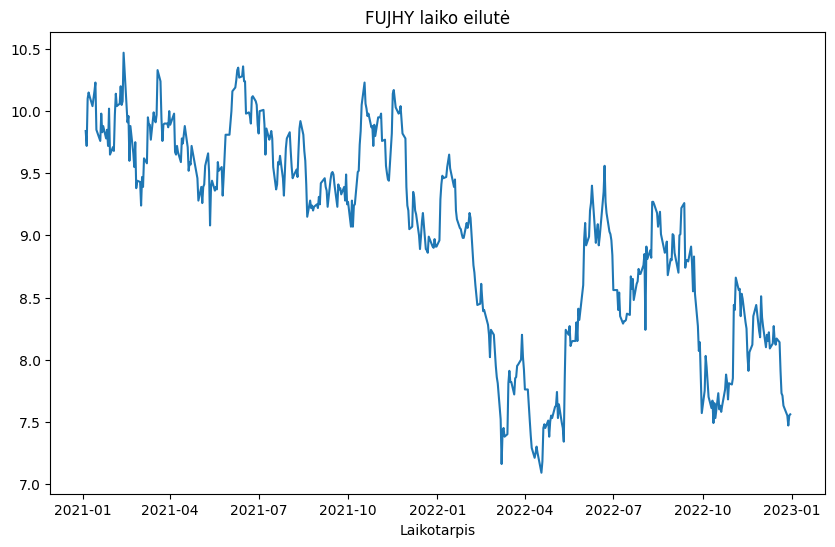

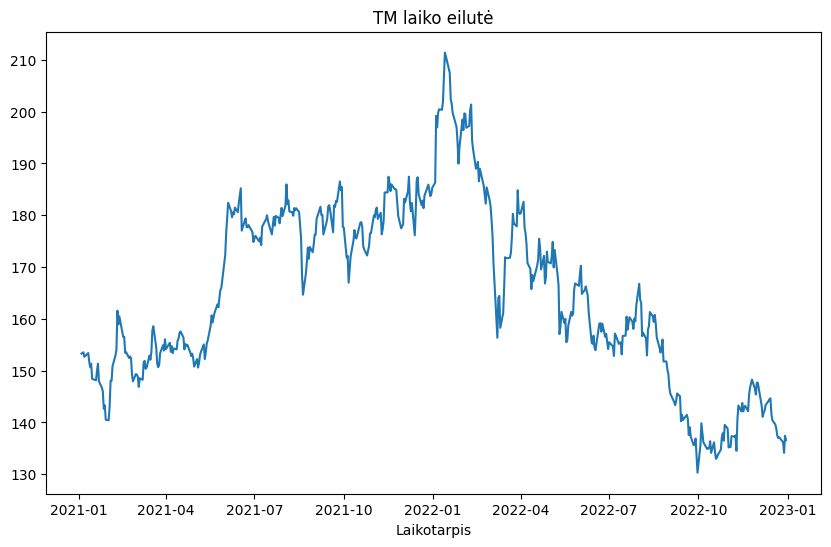

In [7]:
Subaru_Ts.plot_ts()
Toyota_Ts.plot_ts()

### Užduotis 2. Granger priežastingumo analizė

Granger priežastingumas reikalauja tenkinti prielaidą, jog analizuojamos laiko eilutės yra stacionarios.
Kad būtų tenkinama ši sąlyga, laiko eilutė yra diferencijuojama iki dviejų kartų, jei ji nėra stacionari su metodu – differentiate(). Tai patikrinama su Augmented Dickey-Fuller (ADF) testu, kurio nulinė hipotezė yra, jog laiko eilutė yra nestacionari.

In [8]:
Subaru_Ts.differentiate()
Toyota_Ts.differentiate()

FUJHY laiko eilutė nėra stacionari, atliekamas diferencijavimas 1 kartą.
FUJHY laiko eilutė yra stacionari.
TM laiko eilutė nėra stacionari, atliekamas diferencijavimas 1 kartą.
TM laiko eilutė yra stacionari.


Tiek "Subaru Corporation", tiek "Toyota Motor Corporation" akcijų kainų laiko eilutes reikėjo diferencijuoti po 1 kartą, jog jos taptų stacionariomis.

Atvaizduojamos diferencijuotos laiko eilutės.

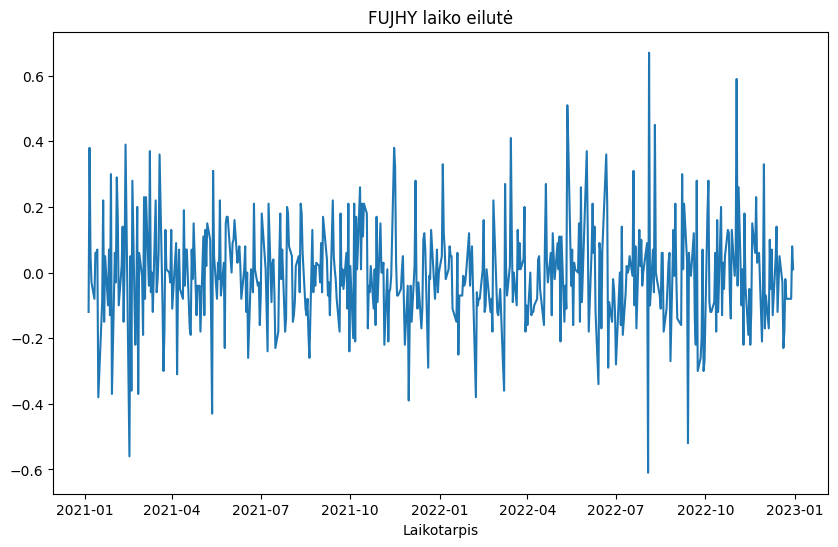

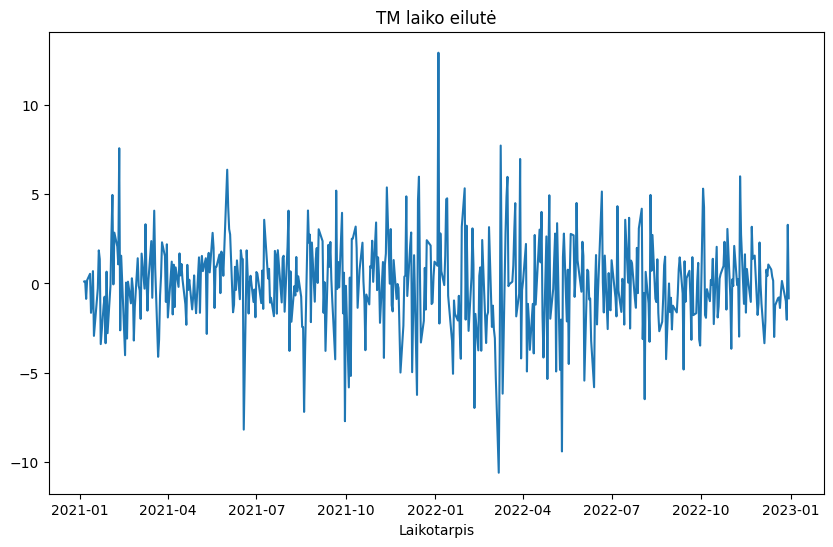

In [9]:
Subaru_Ts.plot_ts()
Toyota_Ts.plot_ts()

Naudojama funkcija granger_Ts atlikti Granger priežastingumą. Jo nulinė hipotezė, jog viena laiko eilutė nedaro įtakos kitai. Funkcija granger_Ts atlieka Granger priežastingumą dvejomis kryptimis, tikrinant ar kuri nors laiko eilutė daro įtaką viena kitai. Nustatomas vėlavimų kiekis – 10.

In [10]:
Biblioteka.granger_Ts(Subaru_Ts, Toyota_Ts)


Vėlavimas = 1, p-reikšmė = 0.08, TM nedaro įtakos FUJHY.
Vėlavimas = 2, p-reikšmė = 0.2, TM nedaro įtakos FUJHY.
Vėlavimas = 3, p-reikšmė = 0.35, TM nedaro įtakos FUJHY.
Vėlavimas = 4, p-reikšmė = 0.51, TM nedaro įtakos FUJHY.
Vėlavimas = 5, p-reikšmė = 0.51, TM nedaro įtakos FUJHY.
Vėlavimas = 6, p-reikšmė = 0.64, TM nedaro įtakos FUJHY.
Vėlavimas = 7, p-reikšmė = 0.69, TM nedaro įtakos FUJHY.
Vėlavimas = 8, p-reikšmė = 0.79, TM nedaro įtakos FUJHY.
Vėlavimas = 9, p-reikšmė = 0.83, TM nedaro įtakos FUJHY.
Vėlavimas = 10, p-reikšmė = 0.89, TM nedaro įtakos FUJHY.
Vėlavimas = 1, p-reikšmė = 0.3, FUJHY nedaro įtakos TM.
Vėlavimas = 2, p-reikšmė = 0.57, FUJHY nedaro įtakos TM.
Vėlavimas = 3, p-reikšmė = 0.64, FUJHY nedaro įtakos TM.
Vėlavimas = 4, p-reikšmė = 0.32, FUJHY nedaro įtakos TM.
Vėlavimas = 5, p-reikšmė = 0.42, FUJHY nedaro įtakos TM.
Vėlavimas = 6, p-reikšmė = 0.51, FUJHY nedaro įtakos TM.
Vėlavimas = 7, p-reikšmė = 0.56, FUJHY nedaro įtakos TM.
Vėlavimas = 8, p-reikšmė = 0.52,

Atlikus Granger priežastingumą, nustatyta, jog nei "Subaru Corporation", nei "Toyota Motor Corporation" diferencijuotos laiko eilutės nedaro įtakos viena kitai, kadangi visais 10 vėlavimų p-reikšmės buvo didesnės, nei nustatyta riba (0.05).

### Užduotis 3. Prognozuoti laiko eilučių reikšmes metus į priekį

Nubraižomi ACF ir PACF grafikai su plot_corr_funcs() metodu. Šie grafikai gali būti naudingi, nustatant kokios eilės ARIMA modelį geriausia kurti.

c:\Python3.10.4\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


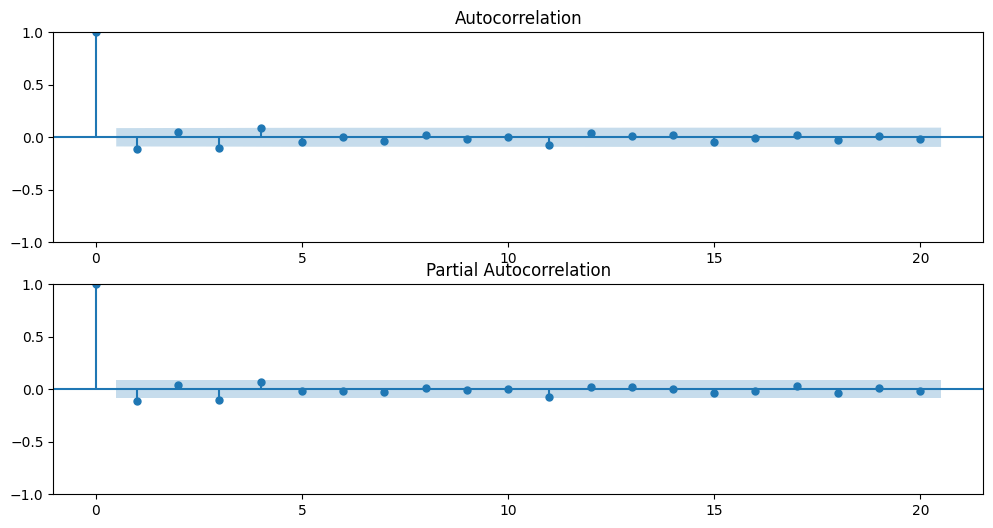

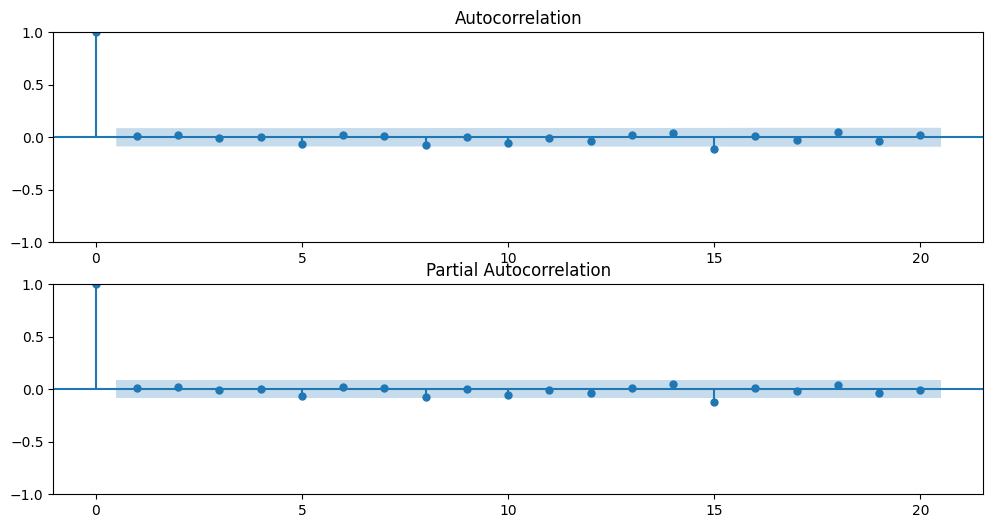

In [11]:
Subaru_Ts.plot_corr_funcs()
Toyota_Ts.plot_corr_funcs()

Sukuriama keletas ARIMA modelių su skirtingais parametrais pasitelkiant metodą – grid_select_arima(). Paduodami parametrai, leidžiantys kurti ARIMA modelius iki 2 eilės, kadangi nerekomenduojama kurti aukštesnės eilės modelių. Diferencijavimų kiekis nustatomas į nulį, kadangi laiko eilutės jau yra stacionarios, bei tokią įžvalgą buvo galima pastebėti iš ACF ir PACF grafikų, kadangi ties pirmu vėlavimu autokoreliacija lygi nuliui arba yra neigiama.

In [13]:
Subaru_Ts.grid_select_arima(2, 2, 2)
Toyota_Ts.grid_select_arima(2, 2, 2)

c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site

                               SARIMAX Results                                
Dep. Variable:                  FUJHY   No. Observations:                  502
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 208.028
Date:                Wed, 25 Oct 2023   AIC                           -410.056
Time:                        16:03:48   BIC                           -397.400
Sample:                             0   HQIC                          -405.090
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0045      0.006     -0.705      0.481      -0.017       0.008
ma.L1         -0.1032      0.037     -2.803      0.005      -0.175      -0.031
sigma2         0.0256      0.001     19.943      0.0

c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python3.10.4\lib\site

Pateikiama statistika to ARIMA modelio, kurio Akaikės informacinis kriterijus (AIC) yra mažiausias.   
"Subaru Corporation" atveju modelis yra – ARIMA(0,0,1).  
"Toyota Motor Corporation" atveju modelis yra ARIMA(0,0,0).

Abejoms laiko eilutėms yra atliekamos prognozės su atitinkamu geriausiu ARIMA modeliu.  
Prognozuojami du paskutinėsiai mėnesiai (40) dienų.

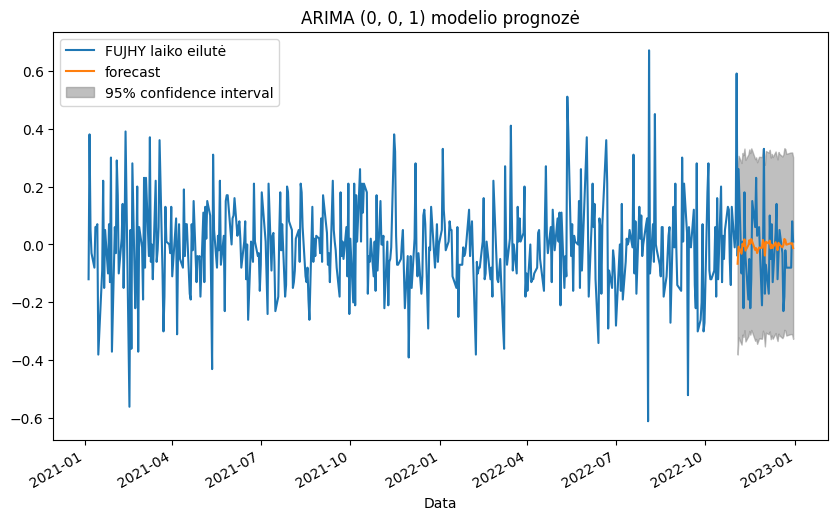

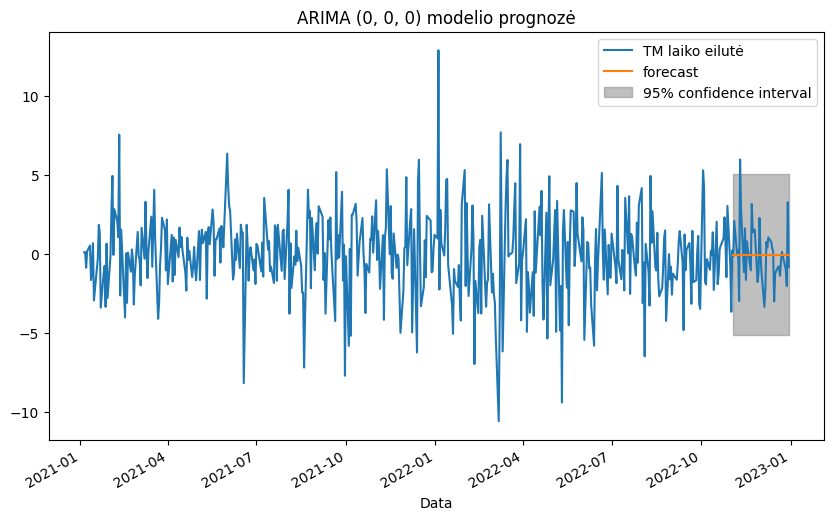

In [14]:
Subaru_Ts.arima_plot_forecast(40)
Toyota_Ts.arima_plot_forecast(40)

Prognozės matomos grafike, taip pat pateikiamas pasikliovimo intervalas.

### Išvados
1. Susipažinta su "Subaru Corporation" ir "Toyota Motor Corporation" akcijų kainomis 2021 – 2023 metais.
2. Tarp "Subaru Corporation" ir "Toyota Motor Corporation" nebuvo rasti priežastiniai ryšiai abejomis kryptimis.
3. Sukurti skirtingi ARIMA modeliai, su geriausiu atlikta diferencijuotų reikšmių prognozė paskutiniems dviems mėnesiams.

### Literatūratos sąrašas
1. Subaru Corporation akcijų kainos iš [Yahoo Finance](https://finance.yahoo.com/quote/FUJHY/).
2. Toyota Motor Corporation akcijų kainos iš [Yahoo Finance](https://finance.yahoo.com/quote/TM/).
3. Straipsnis apie ARIMA modelius iš [TowardsDataScience](https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788).